<a href="https://colab.research.google.com/github/FaddliLWibowo/-Twitter-Sentiment-Analysis-with-Streamlit/blob/main/Data_Collection_From_Twitter_For_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tweet-preprocessor==0.6.0
!pip install tweepy==4.10.1
!pip install textblob==0.15.3
!pip install wordcloud==1.8.2.2
!pip install nltk==3.7
!pip install googletrans==4.0.0-rc1

In [116]:
from wordcloud import WordCloud, STOPWORDS
from datetime import timedelta, datetime
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt 
from tweepy import OAuthHandler
from textblob import TextBlob
import preprocessor as p
import seaborn as sns
import pandas as pd
import numpy as np
import tweepy
import csv
import nltk
import re
import string 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [117]:
#Masukkan twitter token API
# api_key = "UcVNXqPP4r4k10isPrN8Vv50J"
# api_key_secret = "i7FyAvlWmVFaSE2ilPTnj51xKdZeh767exQ8ICHWJutUERntTk"
# access_token = "907513785979592704-Dl1e8GTKqSZU6hAncjP6neOv2IZRpx1"
# access_token_secret ="dC2BpeRVlgBQ7hWPt4hZjm9tSs0aB5DOd5doE3gEG9y9W"

#Masukkan twitter token API
api_key = "GbIGEYyXJW8RtX0KBxtzjNFWb"
api_key_secret = "q47qwDYnsI9I6LAbifsQq5xULG4gYmiaOXD6iZZIjdKeNLXPT5"
access_token = "847732131132358656-yvElNA1Ml5KM19Khl3CMNiMkb7Knk1Y"
access_token_secret ="17KXZyRBfXmDK8UfsMozBnt3RP2C5vA8Rt8vA5rFHoUHY"

In [118]:
# melakukan authentication atau registrasi api key ke api twitter
auth = OAuthHandler(api_key, api_key_secret)
# Mendapat akses dari token yang didapat
auth.set_access_token(access_token, access_token_secret)
# memanggil API twitter
api = tweepy.API(auth)

In [ ]:
def scraptweets(search_words, date_since, date_until,  numTweets):

    db_tweets = pd.DataFrame(columns=['id', 'tweetcreatedts', 'username', 'text', 'source', 'like', 'retweet'])

    tweets = tweepy.Cursor(
                    api.search_tweets, q=search_words, lang="id", 
                    since=date_since, until=date_until,  tweet_mode='extended').items(numTweets)

    tweet_list = [tweet for tweet in tweets]

    for tweet in tweet_list:
        username = tweet.user.screen_name
        tweetcreatedts = tweet.created_at
        id_tweet = tweet.user.id
        source = tweet.source
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count

        try:
            text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.retweeted_status.full_text).split())
        except AttributeError:
            text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.full_text).split())

        ith_tweet = [id_tweet, tweetcreatedts, username, text, source, favorite_count, retweet_count]

        db_tweets.loc[len(db_tweets)] = ith_tweet
    
    print('Proses Scrapping Selesai Dengan Jumlah Data', len(db_tweets))
    filename = 'Data-hasil-crawling.csv'
    db_tweets.to_csv(filename, index=False)

today = datetime.today().strftime("%Y-%m-%d")
last_week = datetime.today() - timedelta(30)
last_week = last_week.strftime("%Y-%m-%d")

search_words = "#mariodandy OR #mariodandysatrio OR #penganiyaanmario OR #anakpejabatpajak -filter:retweets"
date_since = last_week
date_until = today
numTweets = 500

scraptweets(search_words, date_since, date_until, numTweets)

In [140]:
data = pd.read_csv('Data-hasil-crawling.csv')
data.sample(n=5)

,id,tweetcreatedts,username,text,source,like,retweet
367,1456840097446326272,2023-02-25 00:21:02+00:00,KakakLap,Tarakanita Trending Agnes Kekasih Mario Ternya...,Twitter Web App,2,2
81,1696065817,2023-02-26 08:23:12+00:00,KAthwinshagel,Jangan sampai ketinggalan flashsale tenlung ke...,Twitter for Android,0,0
84,1569679840915365889,2023-02-26 08:14:16+00:00,TSewelaz,Harga Jeep Rubicon dan Pajak per Tahunnya Kend...,Twitter Web App,1,0
471,1594880014490959872,2023-02-24 10:23:06+00:00,ketikmedia,Parah 13 Ribu Pegawai Kemenkeu Tak Lapor Kekay...,Twitter Web App,0,0
141,3037149750,2023-02-26 00:43:15+00:00,cndy_isn,Wanita tuh serem banget Adam turun kebumi karn...,Twitter for iPhone,0,0


In [141]:
data.isnull().sum()

id                0
tweetcreatedts    0
username          0
text              0
source            0
like              0
retweet           0
dtype: int64

In [142]:
#Mengganti format tanggal
tanggal = pd.to_datetime(data['tweetcreatedts'])
data['tweetcreatedts'] = tanggal.dt.strftime('%d/%m/%Y %H:%M')
data['tweetcreatedts']

0      26/02/2023 23:41
1      26/02/2023 23:25
2      26/02/2023 22:43
3      26/02/2023 22:22
4      26/02/2023 22:19
             ...       
495    24/02/2023 09:05
496    24/02/2023 09:01
497    24/02/2023 09:00
498    24/02/2023 09:00
499    24/02/2023 08:57
Name: tweetcreatedts, Length: 500, dtype: object

In [143]:
#Mengecek informasi pada kolom dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              500 non-null    int64 
 1   tweetcreatedts  500 non-null    object
 2   username        500 non-null    object
 3   text            500 non-null    object
 4   source          500 non-null    object
 5   like            500 non-null    int64 
 6   retweet         500 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 27.5+ KB


In [144]:
# Menampilkan semua tanda baca dalam bentuk string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [145]:
# Menghilangkan tanda baca dan karakter yang tidak diperlukan
def remove_punct(Tweets):
      #Menggabungkan karakter pada tweet
      Tweets = "".join([char for char in Tweets if char not in string.punctuation])
      #Menghilangkan angka
      Tweets = re.sub('[0-9]+', '', Tweets)
      #Menghilangkan url web
      Tweets = re.sub(r"http\S+", "", Tweets)
      Tweets = re.sub(r"www.\S+", "", Tweets)
      #Mengganti tweet ke huruf kecil  
      Tweets = Tweets.lower()
      return Tweets

# Menggunakan function pada kolom tweet
data['text'] = data['text'].apply(lambda x: remove_punct(x))
data.head()

,id,tweetcreatedts,username,text,source,like,retweet
0,173367363,26/02/2023 23:41,kasatyo,sri mulyani minta klub penggemar moge ditjen p...,Twitter for Android,0,0
1,542416172,26/02/2023 23:25,gustiraidibali,betul pamer harta tidak elok apalagi ada dugaa...,Twitter for Android,0,0
2,103551225,26/02/2023 22:43,tribunkaltim,geram anak buah suka pamer kekayaan sri mulyan...,Twitter Web App,0,0
3,1488881811740856321,26/02/2023 22:22,rizky_kurnia_r,belajar dari kasus penganiyaan anak pegawai pa...,Twitter for Android,0,0
4,1435481198218805249,26/02/2023 22:19,JemberNetwork,kakak mario dandy kenal baik dengan raffi ahma...,Twitter for Android,0,0


In [146]:
#Menghilangkan duplikat pada tweet
data = data.reset_index(drop=True).drop_duplicates(subset='text', keep="last", ignore_index=True)
data

,id,tweetcreatedts,username,text,source,like,retweet
0,173367363,26/02/2023 23:41,kasatyo,sri mulyani minta klub penggemar moge ditjen p...,Twitter for Android,0,0
1,542416172,26/02/2023 23:25,gustiraidibali,betul pamer harta tidak elok apalagi ada dugaa...,Twitter for Android,0,0
2,103551225,26/02/2023 22:43,tribunkaltim,geram anak buah suka pamer kekayaan sri mulyan...,Twitter Web App,0,0
3,1488881811740856321,26/02/2023 22:22,rizky_kurnia_r,belajar dari kasus penganiyaan anak pegawai pa...,Twitter for Android,0,0
4,1435481198218805249,26/02/2023 22:19,JemberNetwork,kakak mario dandy kenal baik dengan raffi ahma...,Twitter for Android,0,0
...,...,...,...,...,...,...,...
472,902837643024539651,24/02/2023 09:05,medcom_id,cristalino david ozora alias david hingga saa...,Twitter for Android,0,0
473,1456251231093997569,24/02/2023 09:01,enha_enhaypen,bener bener gila parah ini bocah ga ngerti lag...,Twitter for Android,58,10
474,375995332,24/02/2023 09:00,OfficialiNewsTV,polisi kembali menetapkan tersangka baru berin...,Twitter Media Studio,0,0
475,2916393212,24/02/2023 09:00,MNCNewsroom,kemenkeu bakal gaet kpk dan ppatk demi telusur...,TweetDeck,0,0


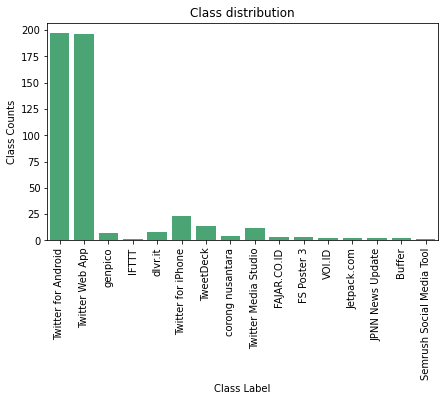

In [147]:
plt.figure(figsize=(7,4))
sns.countplot(x=data.source, color='mediumseagreen')
plt.title('Class distribution')
plt.ylabel('Class Counts')
plt.xlabel('Class Label')
plt.xticks(rotation='vertical');

In [148]:
def preprocessing_data(x):
    return p.clean(x)

def tokenize_data(x):
    return p.tokenize(x)

data['tweet_clean'] = data['text'].apply(preprocessing_data)
data['tweet_clean'] = data['tweet_clean'].apply(tokenize_data)
data = data.drop_duplicates()

In [151]:
# Kalau time out ubah variabel translate
from googletrans import Translator
translater = Translator()

def convert_eng(tweet):
    return translater.translate(tweet, dest='en').text

data['tweet_english'] = data['tweet_clean'].apply(convert_eng)

In [152]:
ps = PorterStemmer() 

def stemming_data(x):
    return ps.stem(x)

data['tweet_english'] = data['tweet_english'].apply(stemming_data)

In [153]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

def klasifikasi(polaritas):
    if polaritas > 0.0:
        return 'Positif'
    elif polaritas > 0.0 == 0.0:
        return 'Netral'
    else:
        return 'Negatif'

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1 

status = pd.DataFrame({'klasifikasi': status})
data['klasifikasi'] = status
data.tail()

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 188
Netral = 185
Negatif = 104

Total Data : 477


In [154]:
data.to_excel('Data-hasil-klasifikasi.xlsx', index=False)

In [155]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), 
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

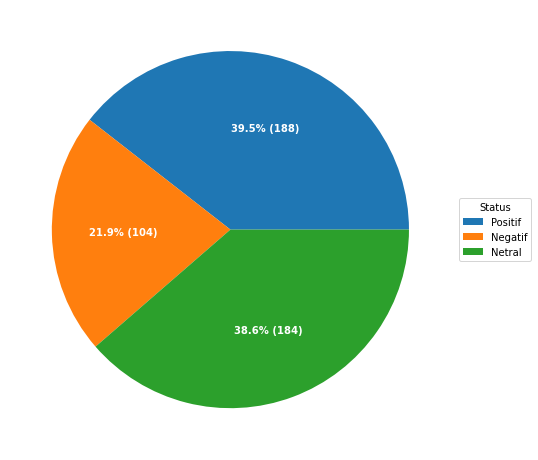

In [156]:
label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "Status")

In [157]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud) 
    plt.axis("off");

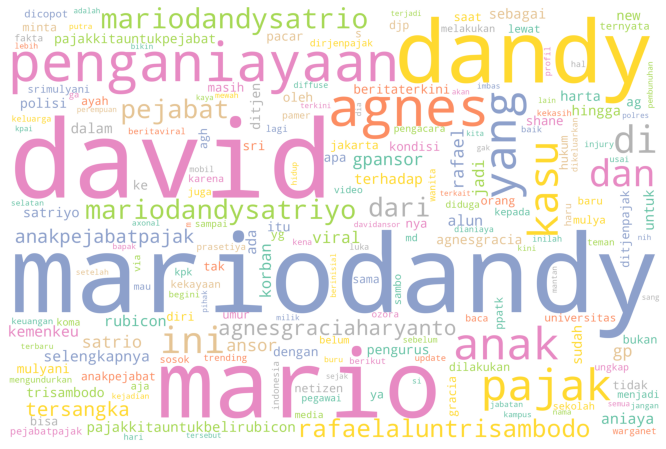

In [158]:
all_words = ' '.join([tweets for tweets in data['tweet_clean']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

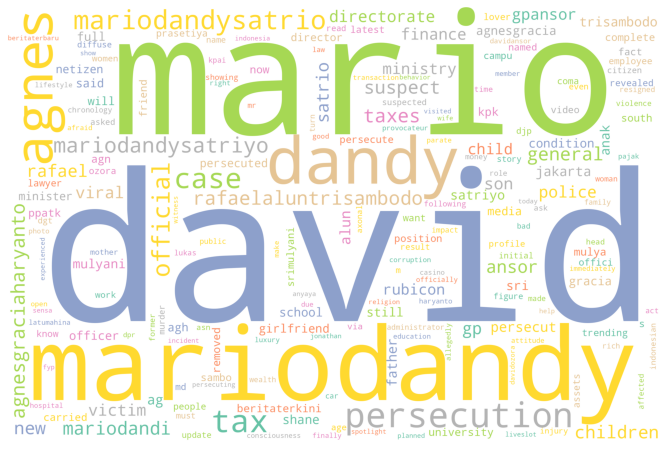

In [159]:
all_words = ' '.join([tweets for tweets in data['tweet_english']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)